In [2]:
#import neccerary libarary

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import os

In [3]:
#load the data set

df= pd.read_csv('datasets_423609_1456925_INFY.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,INFOSYSTCH,EQ,14467.75,15625.00,15625.20,15625.00,15625.20,15625.20,15625.18,5137,8.026657e+12,NaN,NaN,NaN
1,2000-01-04,INFOSYSTCH,EQ,15625.20,16800.00,16875.25,16253.00,16875.25,16855.90,16646.38,56186,9.352937e+13,NaN,NaN,NaN
2,2000-01-05,INFOSYSTCH,EQ,16855.90,15701.00,16250.00,15507.45,15507.45,15507.45,15786.38,164605,2.598516e+14,NaN,NaN,NaN
3,2000-01-06,INFOSYSTCH,EQ,15507.45,15256.65,15300.00,14266.85,14266.85,14266.85,14462.82,81997,1.185908e+14,NaN,NaN,NaN
4,2000-01-07,INFOSYSTCH,EQ,14266.85,13125.50,13125.50,13125.50,13125.50,13125.50,13125.50,7589,9.960942e+12,NaN,NaN,NaN


In [4]:
#Preprocessing and feature extraction

df = df['Open'].values
df = df.reshape(-1, 1)
print(df.shape)
df[:5]



(5141, 1)


array([[15625.  ],
       [16800.  ],
       [15701.  ],
       [15256.65],
       [13125.5 ]])

In [5]:
#spilt them into training and testing set 80% train and 20 %test
#and just substracting 50 so that it overlap and we can visualize easier

dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])
print(dataset_train.shape)
print(dataset_test.shape)



(4112, 1)
(1079, 1)


In [6]:
#we'll use the min/max scalar to scale our data between zero and Run first of all we

# will fit and transform our training data and we'll print the first five rows here 


scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.92590958],
       [1.        ],
       [0.93070181],
       [0.90268302],
       [0.76830191]])

In [7]:
#then we'll transfrom our data
# with the prefix scaler  

dataset_test = scaler.transform(dataset_test)
dataset_test[:5]



array([[0.01709124],
       [0.01730563],
       [0.01817265],
       [0.01828615],
       [0.01705341]])

In [8]:
# next off we will create a function which
#we can use to create datasets as an
#argument df

def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [9]:
# we will create our training data so we
#call creates data set with our data sets
#trained and then we will save it in x_train
#and y_train and variable and we are
#going to put the first row of the X 

x_train, y_train = create_dataset(dataset_train)
x_train[:1]



array([[0.92590958, 1.        , 0.93070181, 0.90268302, 0.76830191,
        0.76830191, 0.77299956, 0.69417996, 0.76669399, 0.71303361,
        0.70994388, 0.68091935, 0.73176115, 0.77299956, 0.75408286,
        0.79822183, 0.81083297, 0.41799609, 0.40891607, 0.41582067,
        0.39781827, 0.4192572 , 0.40828552, 0.4120058 , 0.43874141,
        0.47632259, 0.53332493, 0.49549152, 0.52512769, 0.61797402,
        0.61797402, 0.57437417, 0.57122139, 0.59764172, 0.56176304,
        0.59259726, 0.60274923, 0.53275742, 0.53338798, 0.50186014,
        0.48294344, 0.51440822, 0.57971814, 0.63803203, 0.69352733,
        0.74777729, 0.78876348, 0.74084116, 0.70357526, 0.67841604]])

In [10]:
#create testing data set

x_test, y_test = create_dataset(dataset_test)
x_test[:1]



array([[0.01709124, 0.01730563, 0.01817265, 0.01828615, 0.01705341,
        0.01696198, 0.01650482, 0.01513336, 0.0160256 , 0.01568825,
        0.01519642, 0.01648906, 0.01623684, 0.01657734, 0.01670975,
        0.01697459, 0.01759253, 0.01626836, 0.01702188, 0.0166467 ,
        0.01654581, 0.01576707, 0.01595939, 0.01696828, 0.01832398,
        0.01894823, 0.02043004, 0.01923513, 0.01979948, 0.02011791,
        0.02042373, 0.02055615, 0.02036383, 0.01798663, 0.01478025,
        0.01486853, 0.01522164, 0.01530361, 0.01566934, 0.01563781,
        0.01513336, 0.01703764, 0.01658364, 0.01616117, 0.01557475,
        0.01456901, 0.01398575, 0.01437669, 0.01510183, 0.01507031]])

In [11]:
# Reshape features for LSTM Layer
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [12]:
#Building Mocel

model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [13]:
#Compile the model 

model.compile(loss='mean_squared_error', optimizer='adam')

In [14]:
#check whetert we save the model or not

if(not os.path.exists('stock_prediction.h5')):
    model.fit(x_train, y_train, epochs=50, batch_size=32)
    model.save('stock_prediction.h5')

In [15]:
#load the model

model = load_model('stock_prediction.h5')

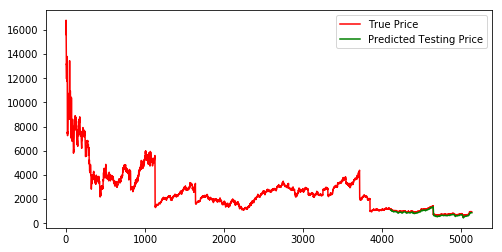

In [16]:
#visualize the model

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df, color='red',  label="True Price")
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions, color='green', label='Predicted Testing Price')
plt.legend()

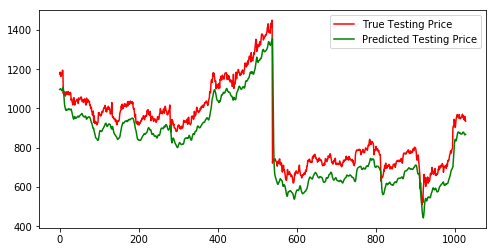

In [17]:
#Plot the actual and predicted price

y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color='red', label='True Testing Price')
plt.plot(predictions, color='green', label='Predicted Testing Price')
plt.legend()

In [18]:
x = x_test[-1]
num_timesteps = 100
preds = []
for i in range(num_timesteps):
    data = np.expand_dims(x, axis=0)
    prediction = model.predict(data)
    prediction = scaler.inverse_transform(prediction)
    preds.append(prediction[0][0])
    x = np.delete(x, 0, axis=0) # delete first row
    x = np.vstack([x, prediction]) # add prediction

print(preds)

[868.3697, 13624.551, 18030.467, 21773.523, 22094.691, 22982.133, 23291.21, 23539.072, 23686.508, 23773.15, 23832.324, 23863.277, 23884.875, 23894.705, 23901.492, 23903.795, 23905.338, 23905.342, 23905.303, 23904.805, 23904.406, 23903.9, 23903.484, 23903.035, 23902.637, 23902.248, 23901.889, 23901.53, 23901.197, 23900.879, 23900.572, 23900.293, 23900.03, 23899.791, 23899.57, 23899.367, 23899.178, 23898.996, 23898.818, 23898.62, 23898.385, 23898.082, 23897.678, 23897.174, 23896.66, 23896.406, 23896.777, 23897.885, 23898.213, 23891.348, 23858.906, 23858.697, 23858.697, 23858.697, 23858.697, 23858.697, 23858.697, 23858.697, 23858.697, 23858.697, 23858.697, 23858.697, 23858.697, 23858.697, 23858.697, 23858.697, 23858.697, 23858.697, 23858.701, 23858.697, 23858.697, 23858.697, 23858.697, 23858.697, 23858.697, 23858.693, 23858.697, 23858.697, 23858.697, 23858.701, 23858.697, 23858.697, 23858.697, 23858.697, 23858.697, 23858.697, 23858.693, 23858.697, 23858.697, 23858.697, 23858.697, 23858.69